# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
#import datetime

# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#set units of measurement to calculate in Celcius not Kelvin
unit = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = query.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | kathmandu
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | labytnangi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | jakobstad
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | krasnogorskoye
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | saryozek
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | hirara
Processing Record 21 of Set 1 | pula
Processi

Processing Record 41 of Set 4 | songea
Processing Record 42 of Set 4 | gharyan
Processing Record 43 of Set 4 | metlaoui
Processing Record 44 of Set 4 | brookings
Processing Record 45 of Set 4 | malabar
Processing Record 46 of Set 4 | mercedes
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | baluntaicun
City not found. Skipping...
Processing Record 49 of Set 4 | ribeira grande
Processing Record 0 of Set 5 | gumdag
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | yaren
Processing Record 3 of Set 5 | mrakovo
Processing Record 4 of Set 5 | santa barbara
Processing Record 5 of Set 5 | vorkuta
Processing Record 6 of Set 5 | general roca
Processing Record 7 of Set 5 | adzope
Processing Record 8 of Set 5 | tame
Processing Record 9 of Set 5 | colares
Processing Record 10 of Set 5 | laventille
Processing Record 11 of Set 5 | sao paulo de olivenca
Processing Record 12 of Set 5 | khandyga
Processing Record 13 of Set 5 | thunder bay
Processing Record

Processing Record 37 of Set 8 | sao joao del rei
Processing Record 38 of Set 8 | rio claro
Processing Record 39 of Set 8 | angra do heroismo
Processing Record 40 of Set 8 | haapsalu
Processing Record 41 of Set 8 | gornyak
Processing Record 42 of Set 8 | onega
Processing Record 43 of Set 8 | tabas
Processing Record 44 of Set 8 | omerli
Processing Record 45 of Set 8 | bom jesus do galho
Processing Record 46 of Set 8 | xai-xai
Processing Record 47 of Set 8 | longyearbyen
Processing Record 48 of Set 8 | cockburn town
Processing Record 49 of Set 8 | boguchany
Processing Record 0 of Set 9 | lamar
Processing Record 1 of Set 9 | codrington
Processing Record 2 of Set 9 | tomatlan
Processing Record 3 of Set 9 | maragogi
Processing Record 4 of Set 9 | maevatanana
City not found. Skipping...
Processing Record 5 of Set 9 | tromso
Processing Record 6 of Set 9 | chifeng
Processing Record 7 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 9 | poxoreo
Processing Recor

Processing Record 25 of Set 12 | san miguel panixtlahuaca
Processing Record 26 of Set 12 | san juan pueblo
Processing Record 27 of Set 12 | kloulklubed
Processing Record 28 of Set 12 | asosa
Processing Record 29 of Set 12 | langzhong
Processing Record 30 of Set 12 | turpan
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | i-n-salah
Processing Record 33 of Set 12 | sevlievo
Processing Record 34 of Set 12 | rio gallegos
Processing Record 35 of Set 12 | zakynthos
Processing Record 36 of Set 12 | borogontsy
Processing Record 37 of Set 12 | buka
Processing Record 38 of Set 12 | el granada
Processing Record 39 of Set 12 | khoyniki
Processing Record 40 of Set 12 | niafunke
Processing Record 41 of Set 12 | amungan
Processing Record 42 of Set 12 | valence
Processing Record 43 of Set 12 | kargopol'
Processing Record 44 of Set 12 | rawson
Processing Record 45 of Set 12 | takamaka
City not found. Skipping...
Processing Record 46 of Set 12 | tutong
Processing Record 47 of Se

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [25]:
# #clean data
# city_data_df= city_data_df.astype({})

# city_data_df.head()
# city_data_df.dtypes

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,3.29,75,40,6.71,CA,1712523518
1,margaret river,-33.9500,115.0667,13.25,76,1,6.82,AU,1712523527
2,papatowai,-46.5619,169.4708,10.11,89,97,1.57,NZ,1712523322
3,kathmandu,27.7167,85.3167,16.12,48,20,1.54,NP,1712523514
4,keflavik,64.0049,-22.5624,0.95,74,75,11.32,IS,1712523184


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City-ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City-ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City-ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,3.29,75,40,6.71,CA,1712523518
1,margaret river,-33.9500,115.0667,13.25,76,1,6.82,AU,1712523527
2,papatowai,-46.5619,169.4708,10.11,89,97,1.57,NZ,1712523322
3,kathmandu,27.7167,85.3167,16.12,48,20,1.54,NP,1712523514
4,keflavik,64.0049,-22.5624,0.95,74,75,11.32,IS,1712523184


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

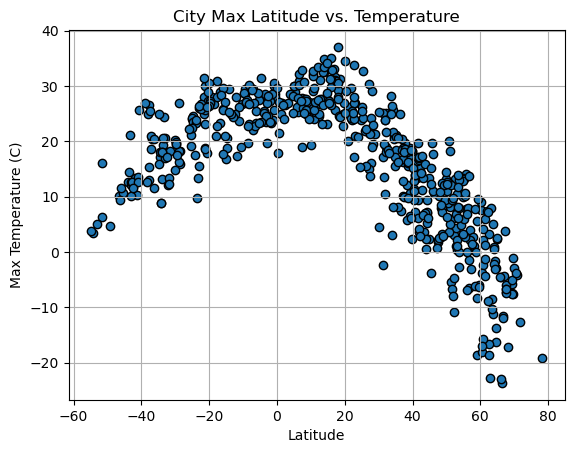

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"] 
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

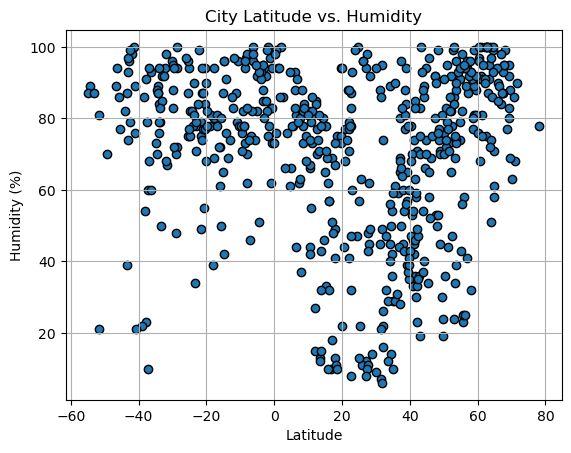

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"] 
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

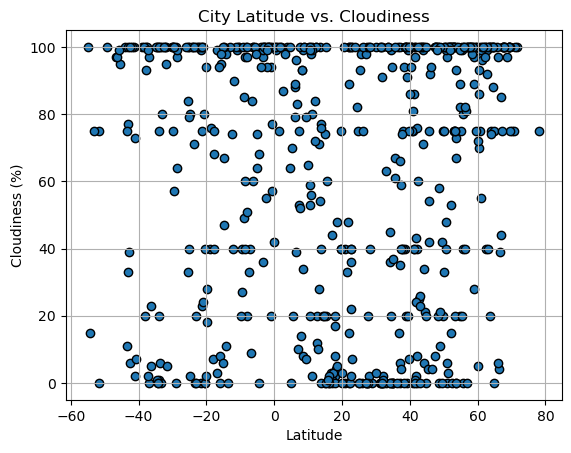

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"] 
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

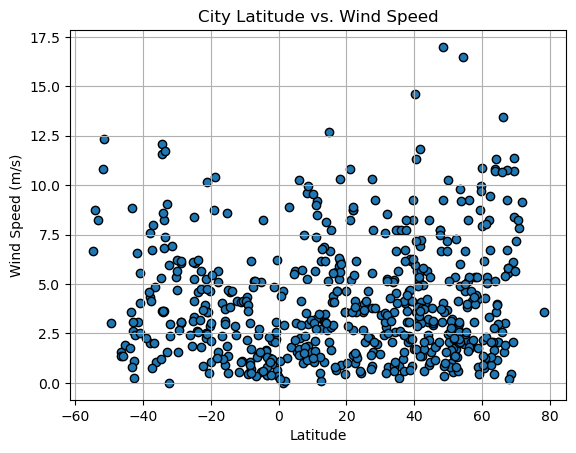

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"] 
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x_values * slope + intercept
    return regress_values, slope, intercept, rvalue, pvalue, stderr

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df  = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City-ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,3.29,75,40,6.71,CA,1712523518
3,kathmandu,27.7167,85.3167,16.12,48,20,1.54,NP,1712523514
4,keflavik,64.0049,-22.5624,0.95,74,75,11.32,IS,1712523184
5,badger,64.8000,-147.5333,2.43,61,100,2.06,US,1712523201
7,labytnangi,66.6572,66.4183,-11.46,94,39,3.04,RU,1712523562


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City-ID,,,,,,,,,
1,margaret river,-33.9500,115.0667,13.25,76,1,6.82,AU,1712523527
2,papatowai,-46.5619,169.4708,10.11,89,97,1.57,NZ,1712523322
6,puerto ayora,-0.7393,-90.3518,29.98,94,57,2.24,EC,1712523285
8,port-aux-francais,-49.3500,70.2167,4.67,70,100,3.05,TF,1712523278
13,tolanaro,-25.0319,46.9987,24.04,94,40,4.12,MG,1712523199


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7601242573030513


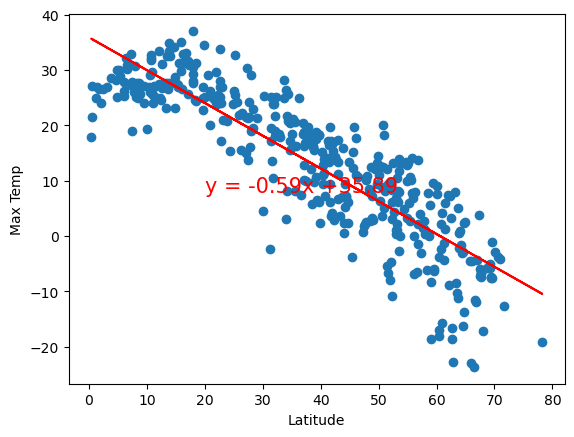

In [36]:
# Linear regression on Northern Hemisphere
#store values
y_values = northern_hemi_df["Max Temp"]
x_values =northern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.5549270030987806


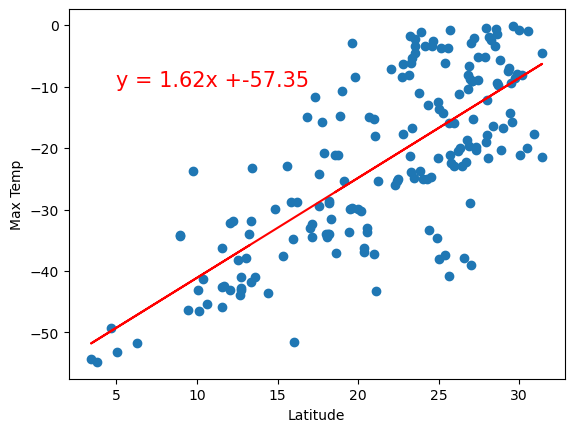

In [39]:
# Linear regression on Southern Hemisphere
#store values
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
Northern Hemisphere : There is a strong negative correlation between (.79) latitude and max temp. The further north or from the equator, the lower the temperatures.
Southern Hemisphere : There is a moderate positive correlation (.57) between latitude and max temp. The further south the warmer it is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.059413369624595466


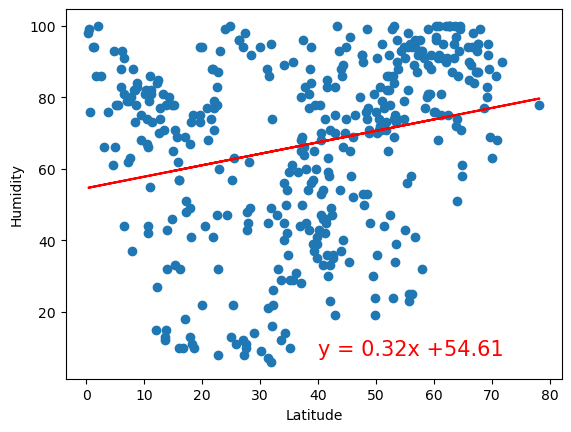

In [41]:
# Northern Hemisphere
#store values
y_values = northern_hemi_df["Humidity"]
x_values =northern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.01934935207665448


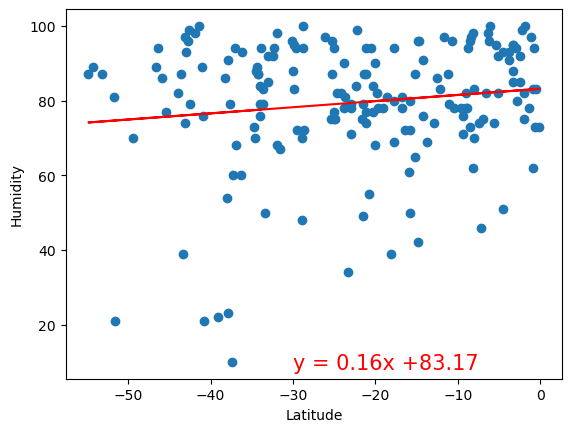

In [42]:
# Southern Hemisphere
#store values
y_values = southern_hemi_df["Humidity"]
x_values =southern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere : There is a weak postive correlation between (.05) latitude and humidity. The closer to the equator the higher the humidity. 

Southern Hemisphere : There is a very weak positive correlation (.01) between latitude and humidity. The closer to the equator higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.053907011061710655


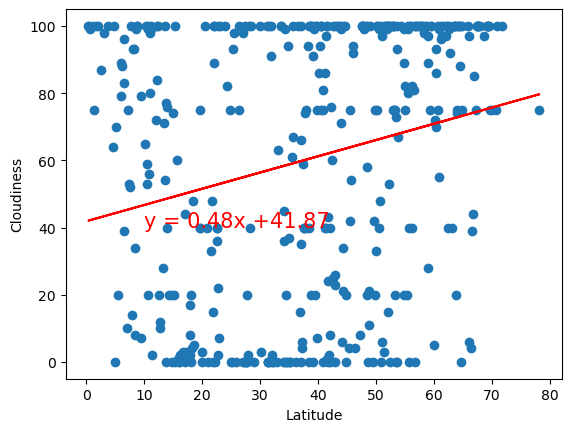

In [43]:
# Northern Hemisphere
#store values
y_values = northern_hemi_df["Cloudiness"]
x_values =northern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.006538573182694219


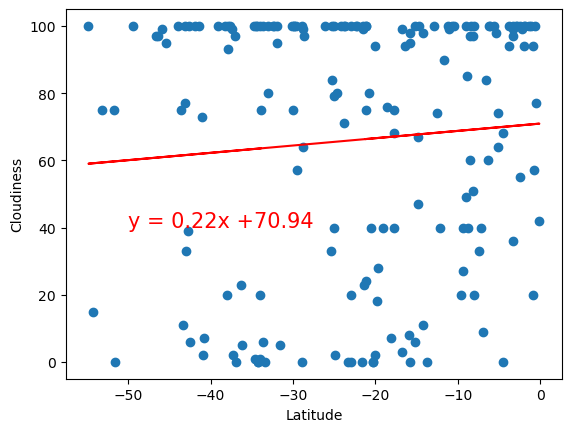

In [44]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values =southern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01057050751269749


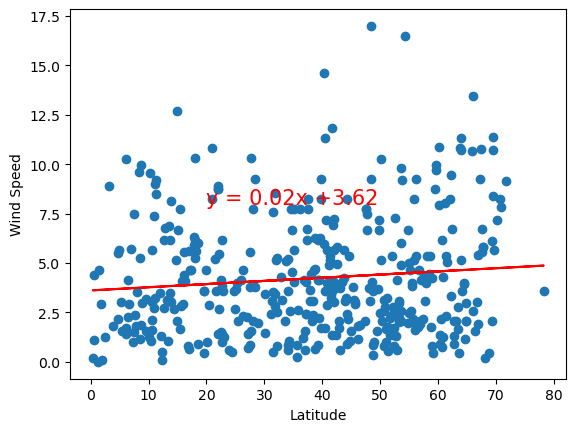

In [45]:
# Northern Hemisphere
#store values
y_values = northern_hemi_df["Wind Speed"]
x_values =northern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.13251407410781726


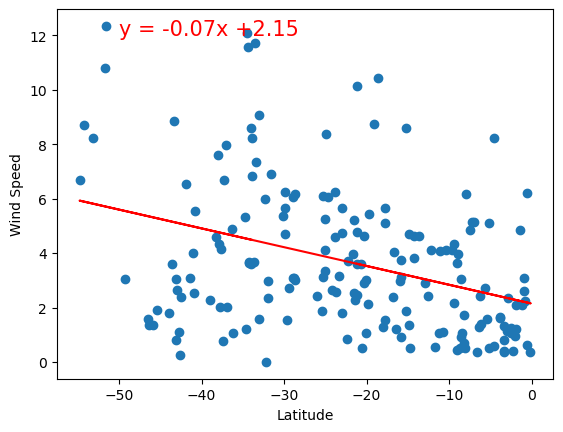

In [46]:
# Southern Hemisphere
y_values = southern_hemi_df["Wind Speed"]
x_values =southern_hemi_df["Lat"]
#
(regress_values, slope, intercept, rvalue, pvalue, stderr) =linear_regression(x=x_values, y=y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere : There is a very weak postive correlation between (.004, nearly no correlation) latitude and wind speed. The further north, the higher the wind speed. 

Southern Hemisphere : There is a very weak positive correlation (.05) between latitude and wind speed. The closer to the equator, the lower the wind speed.